
## 1. Выбор и подготовка набора данных


Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных я должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных по прогнозированию сужения сосудов https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

Эта задача является очень актуальнойб т.к. сужение сосудов может привести к их затромбированию и последующему инсульту. Ежегодно в одной только России регистрируется около 50 000 случаев сердечного приступа.

Датасет состоит из файла:
    data.csv - выборка

Датасет содержит следующие колонки:
1. age – возраст в годах
2. sex - пол (1 = мужчина; 0 = женщина)
3. cp - тип грудной боли (1: типичная стенокардия, 2: атипичная стенокардия, 3: неангинозная боль, 4: бессимптомная)
4. trestbps - артериальное давление в покое (в мм рт. ст.)
5. chol - холестерин в сыворотке в мг/дл
6. fbs - уровень сахара в крови натощак > 120 мг/дл (1 = верно, 0 = неверно)
7. restecg - результаты электрокардиографии в покое (0: нормально, 1: наличие аномалии ST-T (инверсия зубца T и/или
элевация или депрессия ST > 0,05 мВ), 2: указание на возможную или определенную гипертрофию левого желудочка
по критериям Эстеса)
8. thalach - максимальный достигнутый пульс
9. exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
10. oldpeak - депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. num - диагноз болезни сердца (0: сужение диаметра сосудов < 50%, 1: сужение диаметра > 50%)

Будем решать задачу классификации:
    Для решения задачи классификации в качестве целевого признака будем использовать "num". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первых ячейках ноутбука.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

### Голова таблицы

In [2]:
data = pd.read_csv('./data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
3,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
4,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0


In [ ]:
data.isnull().sum()

In [3]:
# Уберем столбцы slope, ca, thal (так как в них почти не содержится данных) и записи с недостающими данными
data = data.drop(columns=['slope', 'ca', 'thal'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.612261,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.931914,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [5]:
print("Размер набора:")
print(f'В датасете {data.shape[0]} строк и {data.shape[1]} колонок.')

Размер набора:
В датасете 261 строк и 11 колонок.


Проведем удаление лишних столбцов.
Просмотрев все столбцы, оказалось, что они все нужны.

## 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

Проверим пропуски:

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

Как видим, пропуски отсутствуют

Проверим датасет на сбалансированность.

In [7]:
data['num'].value_counts()

0    163
1     98
Name: num, dtype: int64

In [8]:
total = data.shape[0]
class_0, class_1 = data['num'].value_counts()
print('Сосуды сильно сужены у {}%, сосуды сужены умеренно у {}% в представленной выборке.'
      .format(round(class_1 / total, 4)*100, round(class_0 / total, 4)*100))

Сосуды сильно сужены у 37.55%, сосуды сужены умеренно у 62.45% в представленной выборке.


Вывод. Дисбаланс классов присутствует, но является приемлемым.

#### Построение графиков для понимания структуры данных

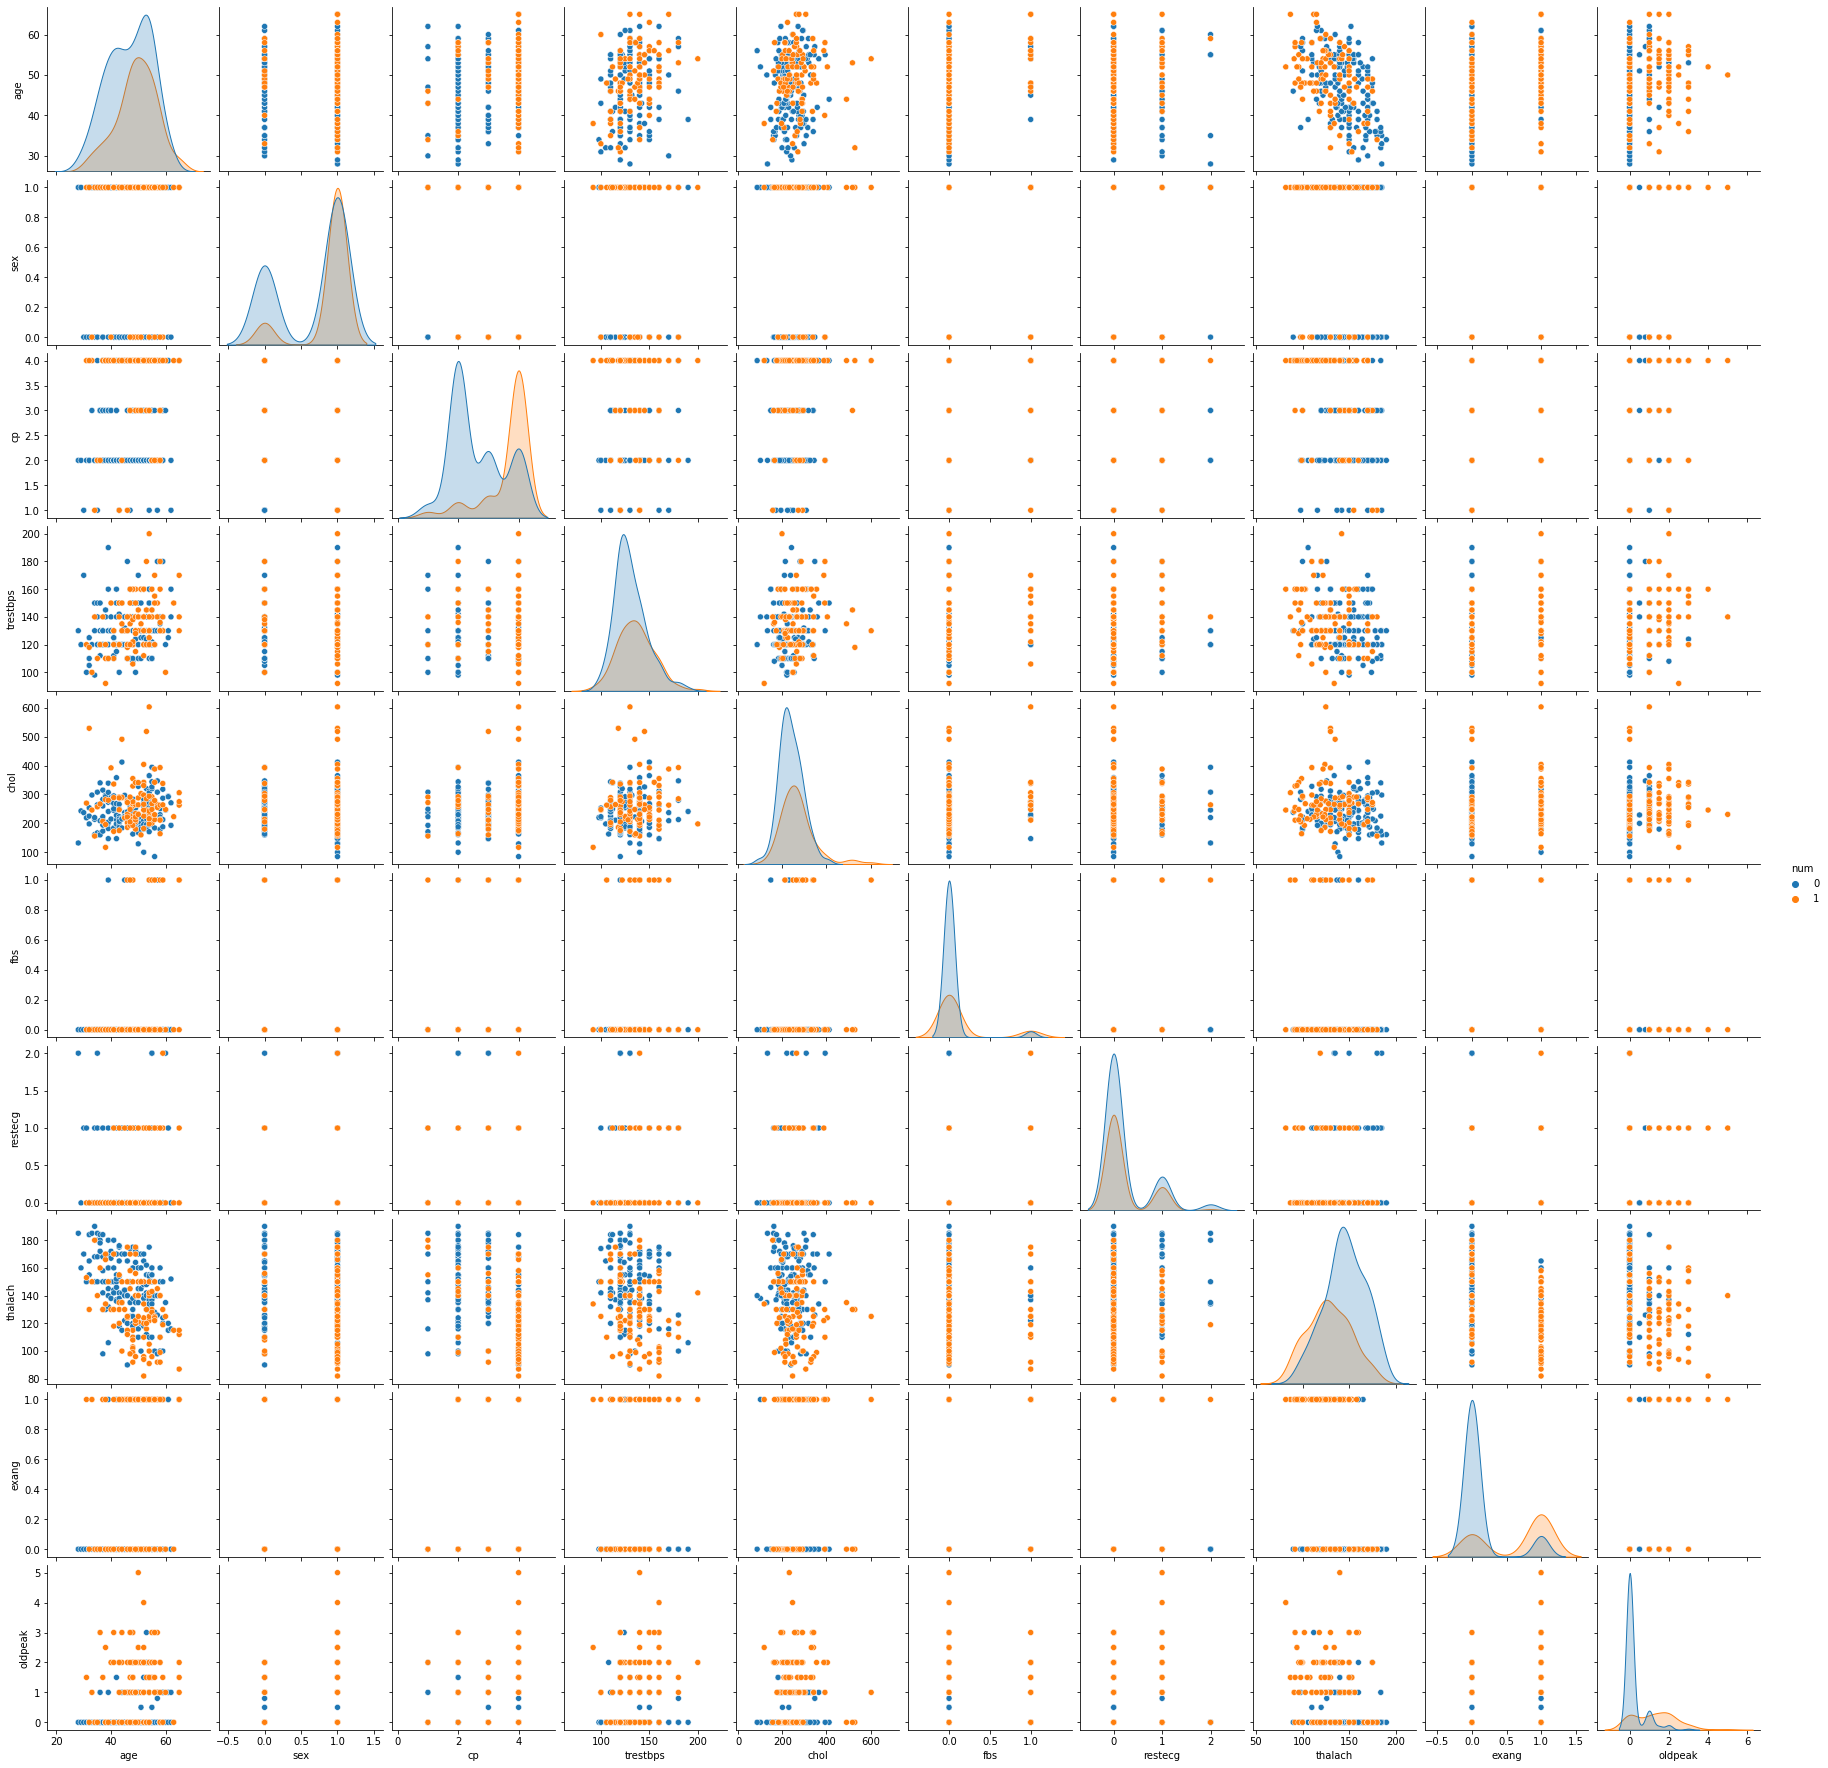

In [9]:
sns.pairplot(data, hue="num")

#### Убедимся, что целевой признак для задачи бинарной классификации содержит только 0 и 1

In [10]:
data['num'].unique()

array([0, 1])

### Скрипичные диаграммы для числовых колонок

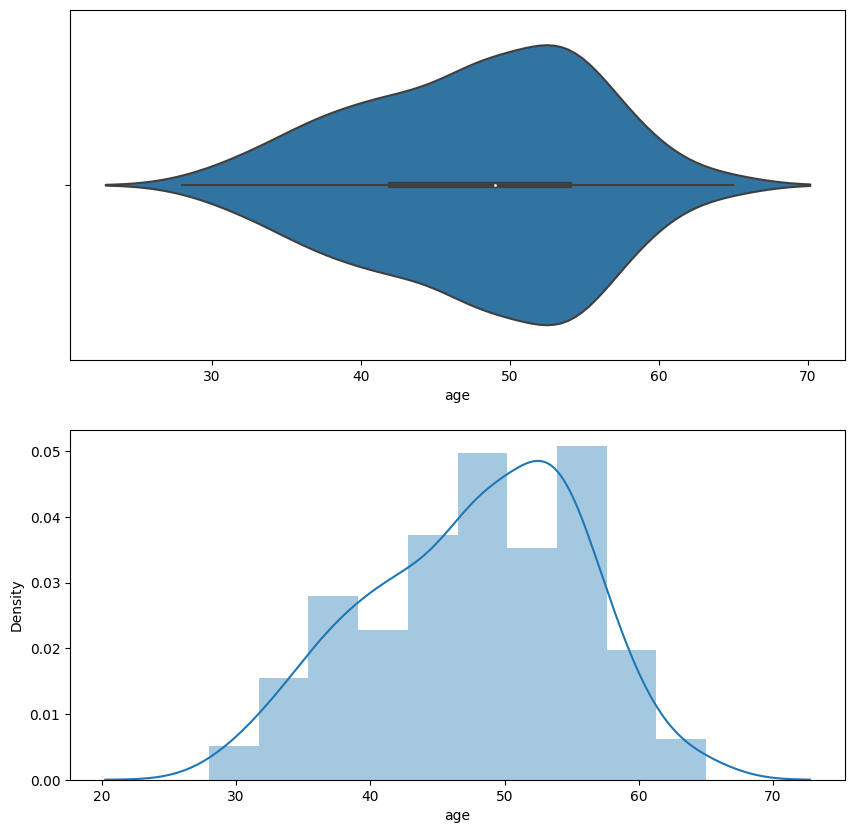

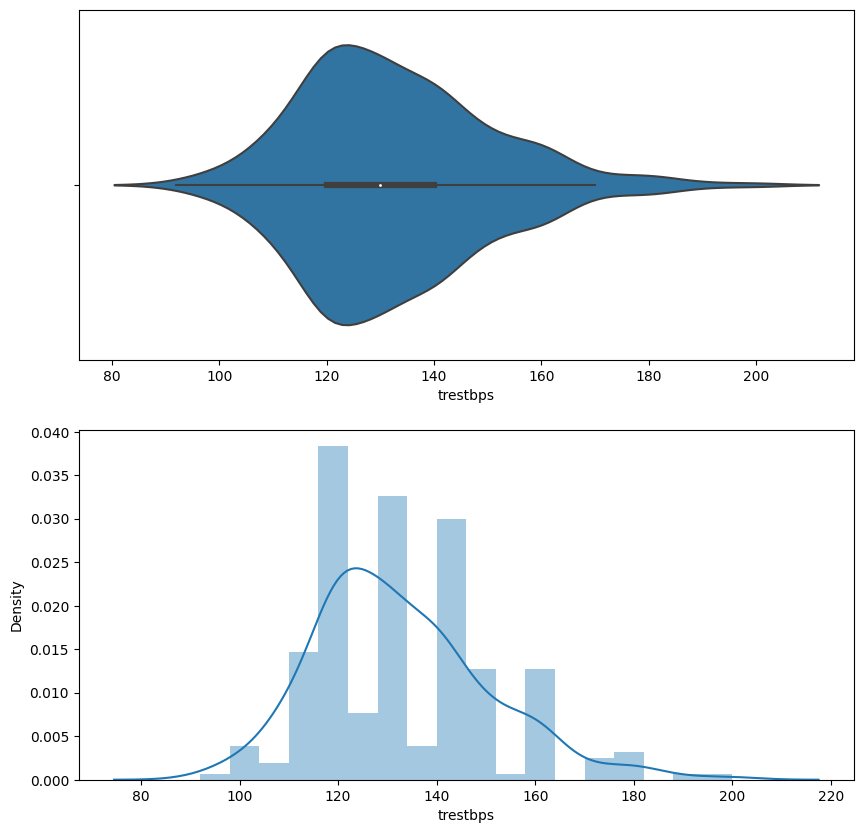

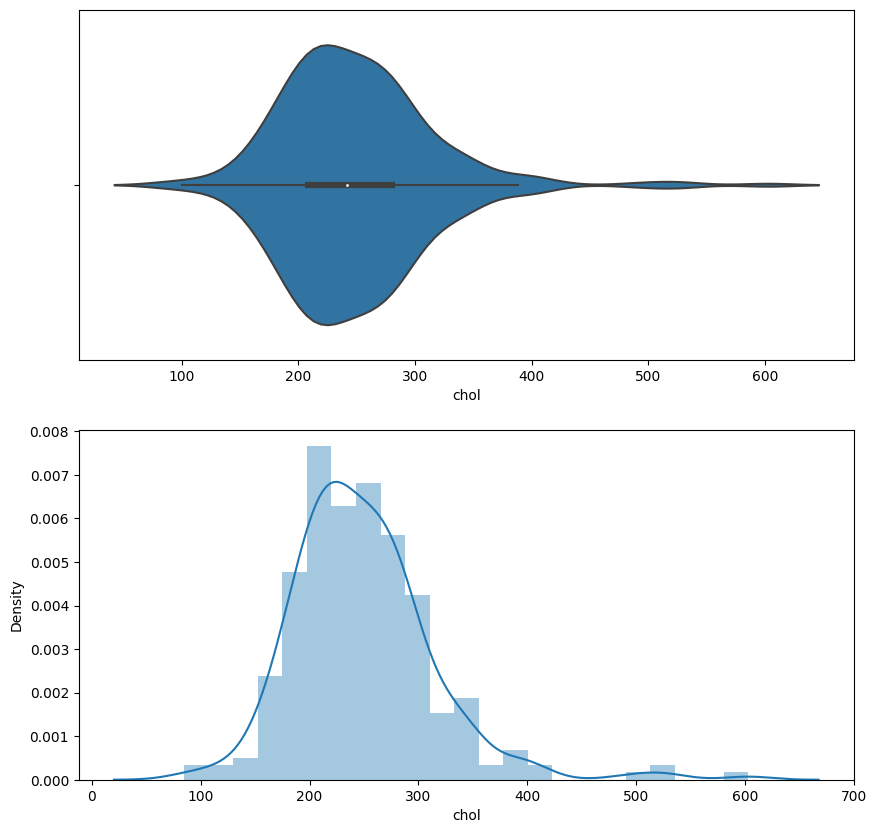

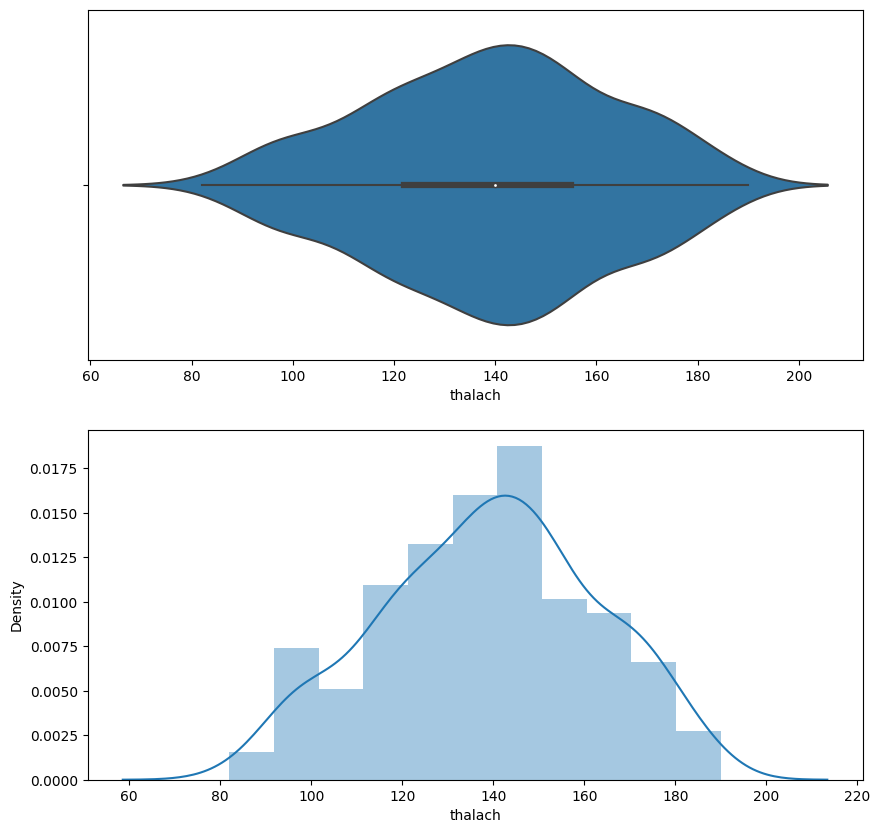

In [11]:

for col in ['age', 'trestbps', 'chol', 'thalach']:

    fig, ax = plt.subplots(2, 1, figsize=(10,10))
    sns.violinplot(ax=ax[0], x=data[col])
    sns.distplot(data[col], ax=ax[1])

## 4. (Перед пунктом 3) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

<AxesSubplot:>

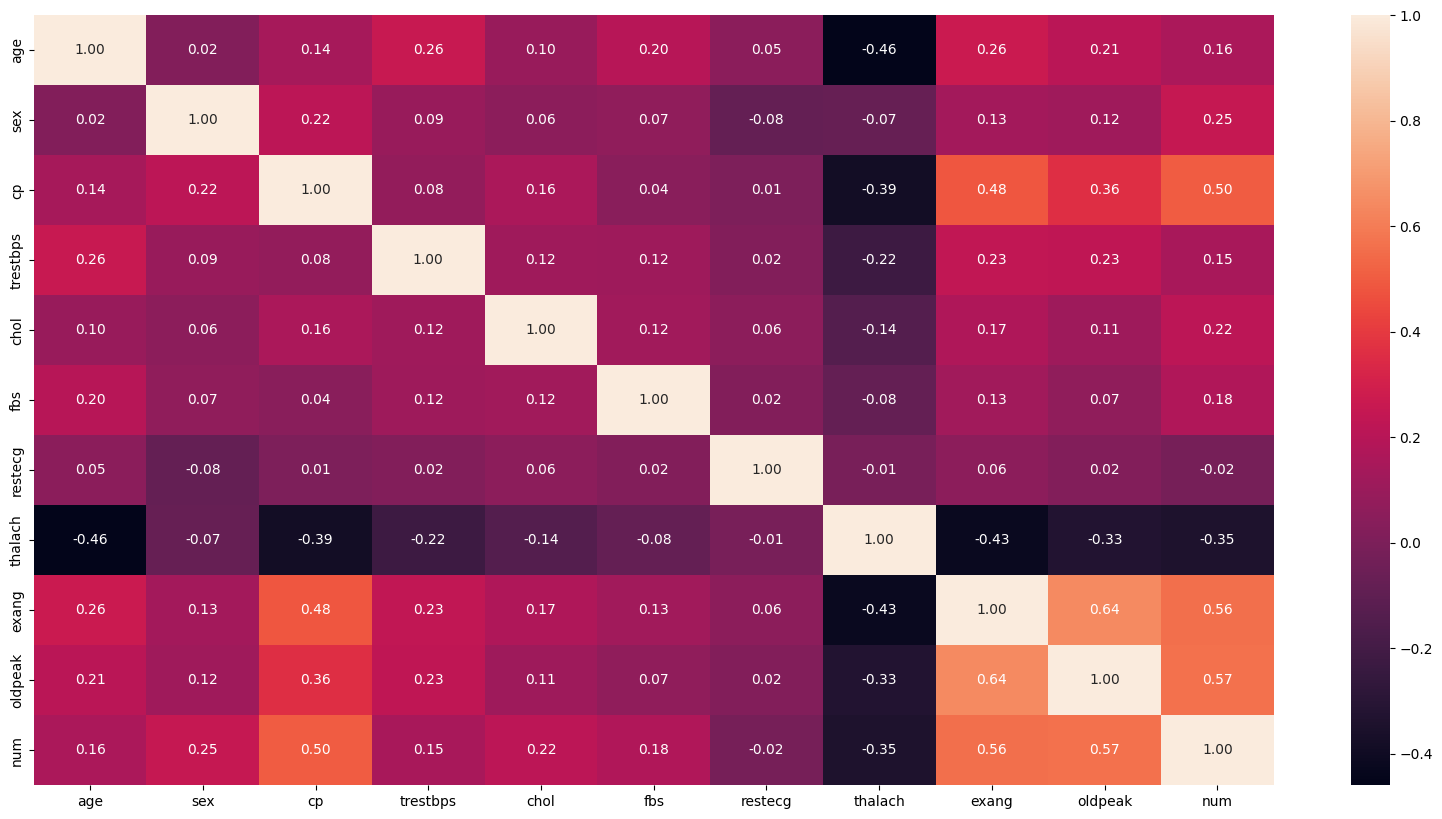

In [12]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')



### На основе корреляционной матрицы можно сделать следующие выводы:

    1) Целевой признак классификации "num" наиболее сильно коррелирует с грудной болью cp (0,5); со стенокардией (0,56); с депрессией ST-сегмента (0.57). Эти признаки обязательно следует оставить в модели классификации.

    2) У нас нет признаков которые имеют корреляцию, близкую по модулю к 1, поэтому никакие признаки не следуют исключать из модели по этому признаку.

    3) Однако у нас существует признак, который имеет корреляцию, близкую по модулю к 0 по отношению к целевому параметру, а именно: restecg (-0.02) - результаты электрогардиографии в покое. Также этот признак имеет корреляцию, близкую по модулю к 0, с остальными параметрами.
    
    4) Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.



In [13]:
# Удалим признак, имеющий близкую по модулю к 0 корреляцию с целевым параметром:
data = data.drop(columns=['restecg'])

## 3. (После пункта 4) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [14]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object

Вспомогательные признаки для улучшения качества моделей мы строить не будем.

In [15]:
# Числовые колонки для масштабирования
scale_cols = ['age', 'trestbps', 'chol', 'thalach']

In [16]:
data_scaled = data

In [17]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_scaled[scale_cols])

In [18]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_scaled[new_col_name] = sc1_data[:,i]

In [19]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,num,age_scaled,trestbps_scaled,chol_scaled,thalach_scaled
0,28,1,2,130,132,0,185,0,0.0,0,0.000000,0.351852,0.090734,0.953704
1,29,1,2,120,243,0,160,0,0.0,0,0.027027,0.259259,0.305019,0.722222
2,30,0,1,170,237,0,170,0,0.0,0,0.054054,0.722222,0.293436,0.814815
3,31,0,2,100,219,0,150,0,0.0,0,0.081081,0.074074,0.258687,0.629630
4,32,0,2,105,198,0,165,0,0.0,0,0.108108,0.120370,0.218147,0.768519


Теперь удалим ненормализованные колонки

In [20]:
data_scaled = data_scaled.drop(scale_cols, axis=1)
data_scaled.head()

,sex,cp,fbs,exang,oldpeak,num,age_scaled,trestbps_scaled,chol_scaled,thalach_scaled
0,1,2,0,0,0.0,0,0.000000,0.351852,0.090734,0.953704
1,1,2,0,0,0.0,0,0.027027,0.259259,0.305019,0.722222
2,0,1,0,0,0.0,0,0.054054,0.722222,0.293436,0.814815
3,0,2,0,0,0.0,0,0.081081,0.074074,0.258687,0.629630
4,0,2,0,0,0.0,0,0.108108,0.120370,0.218147,0.768519


In [21]:
data_scaled = data_scaled.reindex(columns=['age_scaled', 'sex', 'cp', 'trestbps_scaled', 'chol_scaled', 'fbs', 'thalach_scaled', 'exang', 'oldpeak', 'num'])

<AxesSubplot:>

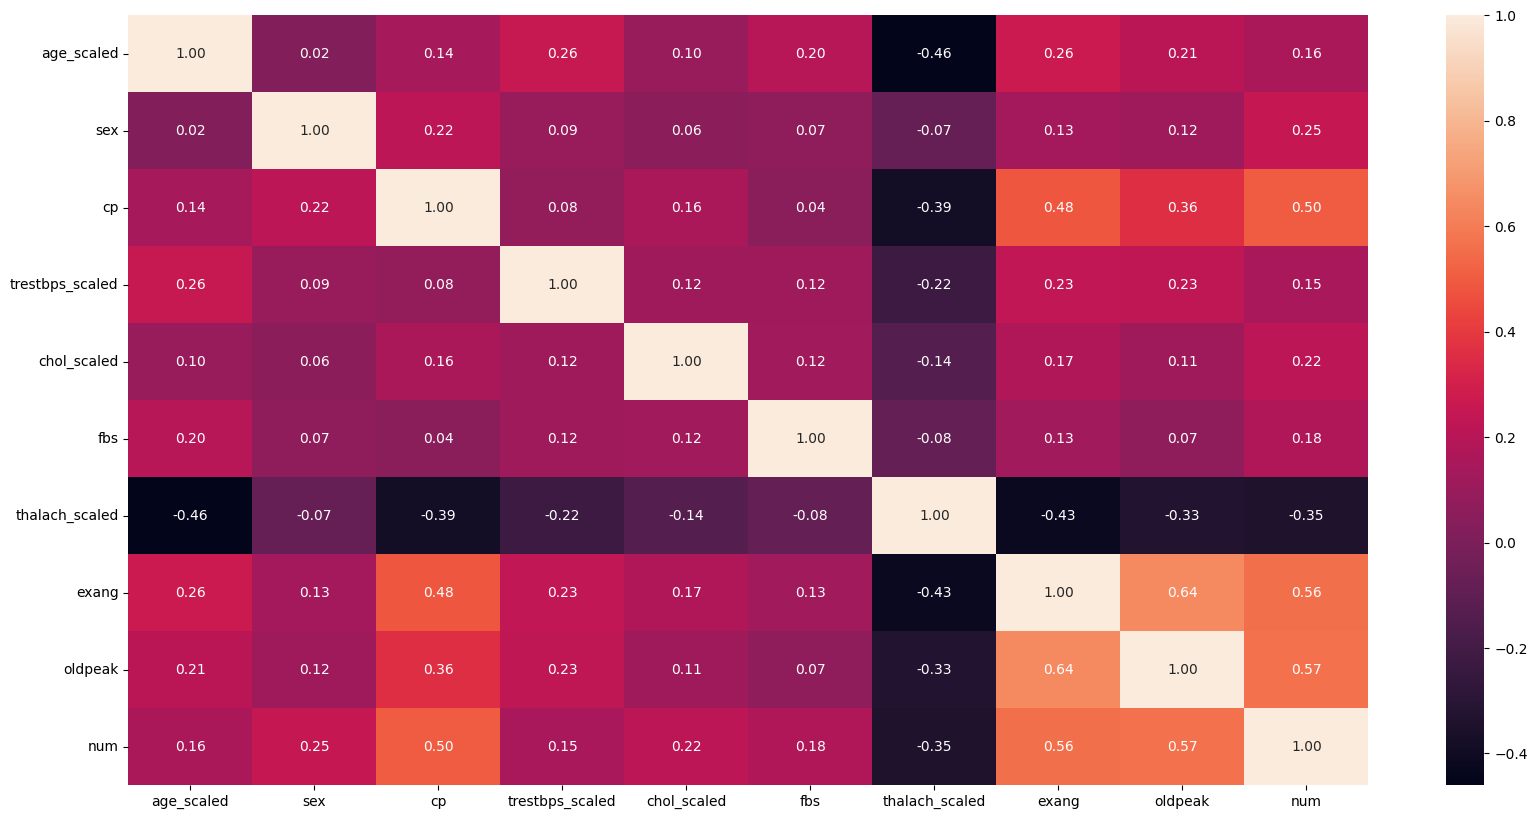

In [22]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data_scaled.corr(), annot=True, fmt='.2f')

Так как таблица корелляции не была изменена после нормализации, мы можем продолжить работу.

## 5. Выбор метрик для последующей оценки качества моделей.

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)


### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [23]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## 6. Выбор наиболее подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [24]:
X = data_scaled.drop('num', axis=1)
Y = data_scaled['num']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(182, 9), (79, 9)
(182,), (79,)


## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [26]:
models =    {'LogR': LogisticRegression(),
            'KNN_5':KNeighborsClassifier(n_neighbors=5),
            'Tree':DecisionTreeClassifier(),
            'RF':RandomForestClassifier(),
            'GB':GradientBoostingClassifier()}

In [27]:
clasMetricLogger = MetricLogger()
accuracies = {}

In [28]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [29]:
clas_X_train = X_train
clas_Y_train = Y_train
clas_X_test = X_test
clas_Y_test = Y_test

In [30]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

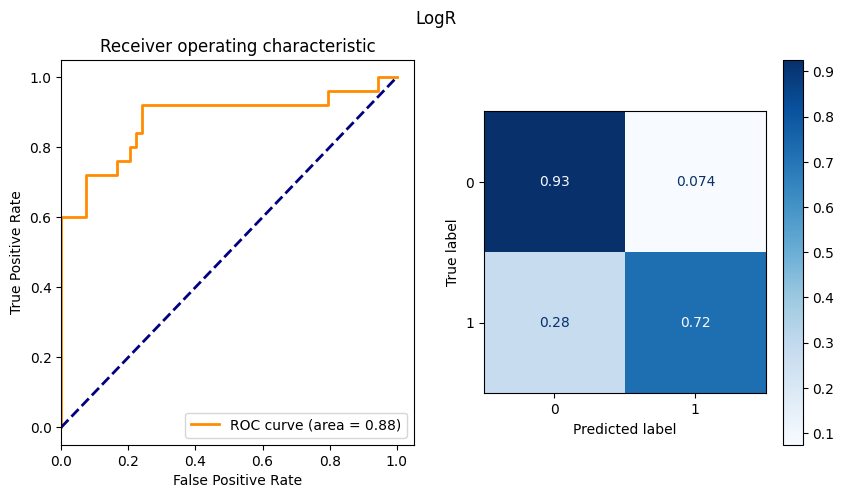

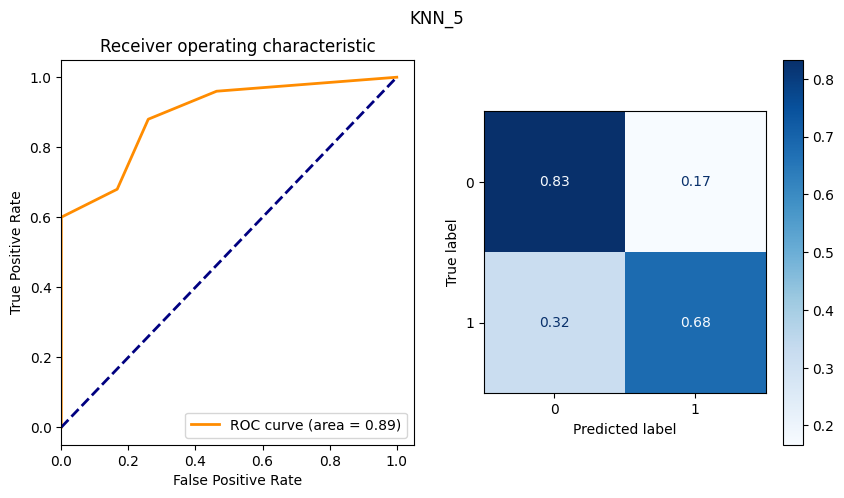

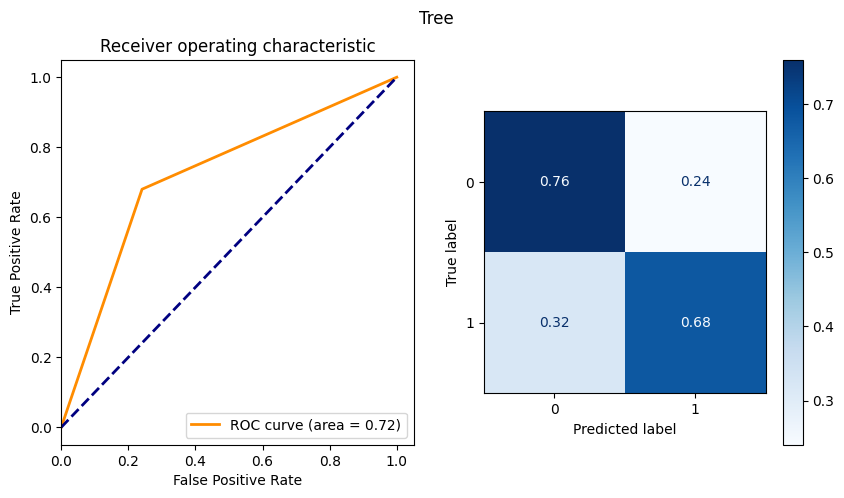

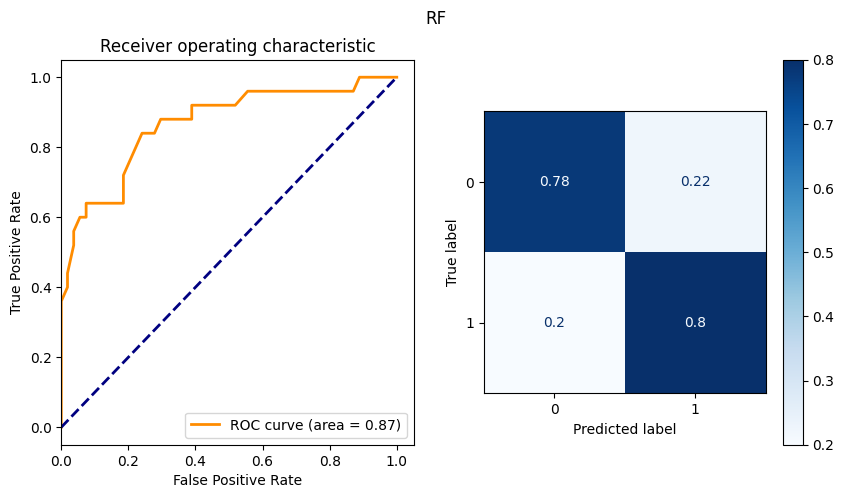

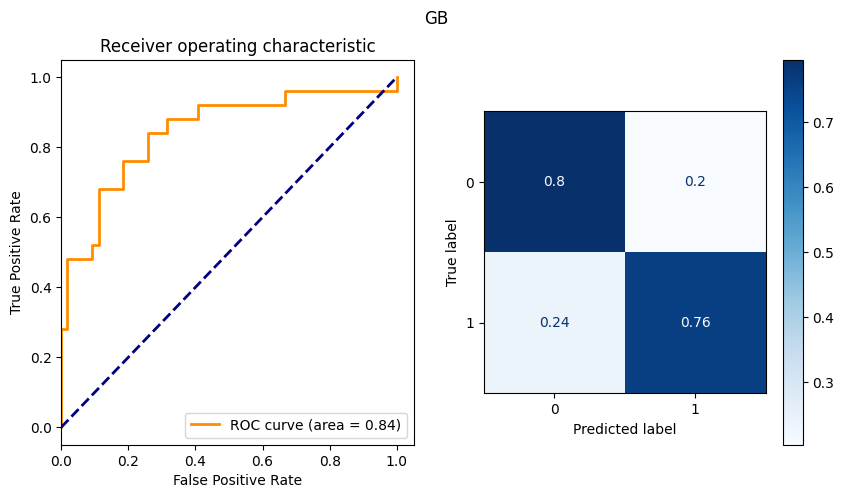

In [31]:
for model_name, model in models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## 9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [32]:
clas_X_train.shape

(182, 9)

In [33]:
n_range_list = list(range(0,120,1))
n_range_list[0] = 1

In [34]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119])}]

In [35]:
%%time
clf_gs2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs2.fit(clas_X_train, clas_Y_train)

CPU times: user 14 s, sys: 668 ms, total: 14.7 s
Wall time: 4.01 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])}],
             scoring='roc_auc')

In [36]:
# Лучшая модель
clf_gs2.best_estimator_

KNeighborsClassifier(n_neighbors=29)

In [37]:
# Лучшее значение параметров
clf_gs2.best_params_

{'n_neighbors': 29}

In [38]:
clf_gs2_best_params_txt = str(clf_gs2.best_params_['n_neighbors'])
clf_gs2_best_params_txt

'29'

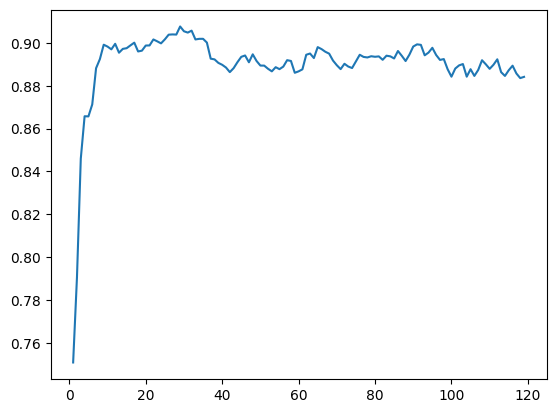

In [39]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs2.cv_results_['mean_test_score'])

In [40]:
# Поиск оптимальных гиперпараметров для LogisticRegression

tuned_parameters = [{'C':[0.25,0.5,0.75,1],'random_state':[0]}]
clf_gs1 = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs1.fit(clas_X_train, clas_Y_train)
clf_gs1_best_params_txt = str(clf_gs1.best_params_)
clf_gs1_best_params_txt

"{'C': 0.25, 'random_state': 0}"

In [41]:
# Поиск оптимальных гиперпараметров для DecisionTreeClassifier

tuned_parameters = [{'criterion':['gini','entropy'],'random_state':[0]}]
clf_gs3 = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs3.fit(clas_X_train, clas_Y_train)
clf_gs3_best_params_txt = str(clf_gs3.best_params_)
clf_gs3_best_params_txt

"{'criterion': 'entropy', 'random_state': 0}"

In [42]:
# Поиск оптимальных гиперпараметров для RandomForestClassifier

tuned_parameters = [{'n_estimators':n_range_list,'criterion':['gini','entropy'],'random_state':[0]}]
clf_gs4 = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs4.fit(clas_X_train, clas_Y_train)
clf_gs4_best_params_txt = str(clf_gs4.best_params_)
clf_gs4_best_params_txt

"{'criterion': 'entropy', 'n_estimators': 119, 'random_state': 0}"

In [43]:
# Поиск оптимальных гиперпараметров для GradientBoostingClassifier

tuned_parameters = [{'n_estimators':n_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]
clf_gs5 = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs5.fit(clas_X_train, clas_Y_train)
clf_gs5_best_params_txt = str(clf_gs5.best_params_)
clf_gs5_best_params_txt

"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 11, 'random_state': 0}"

In [44]:
# grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
#                (KNeighborsRegressor(), [{'n_neighbors':n_range_list}]),
#                (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
#                (RandomForestClassifier(),[{'n_estimators':n_range_list,'criterion':['gini','entropy'],'random_state':[0]}]),
#                (GradientBoostingClassifier(),[{'n_estimators':n_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]

## 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [51]:
clas_models_grid = {'LogR': LogisticRegression(C = 0.25, random_state = 0),
                    str('LogR' + clf_gs1_best_params_txt):clf_gs1.best_estimator_,
                    'KNN_5':KNeighborsClassifier(n_neighbors=29), 
                    str('KNN_' + clf_gs2_best_params_txt):clf_gs2.best_estimator_,
                    'Tree':DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
                    str('Tree' + clf_gs3_best_params_txt):clf_gs3.best_estimator_,
                    'RF':RandomForestClassifier(criterion = 'entropy', n_estimators = 119, random_state = 0),
                    str('RF' + clf_gs4_best_params_txt):clf_gs4.best_estimator_,
                    'GB':GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'exponential', n_estimators = 11, random_state = 0),
                    str('GB' + clf_gs5_best_params_txt):clf_gs5.best_estimator_
                    }

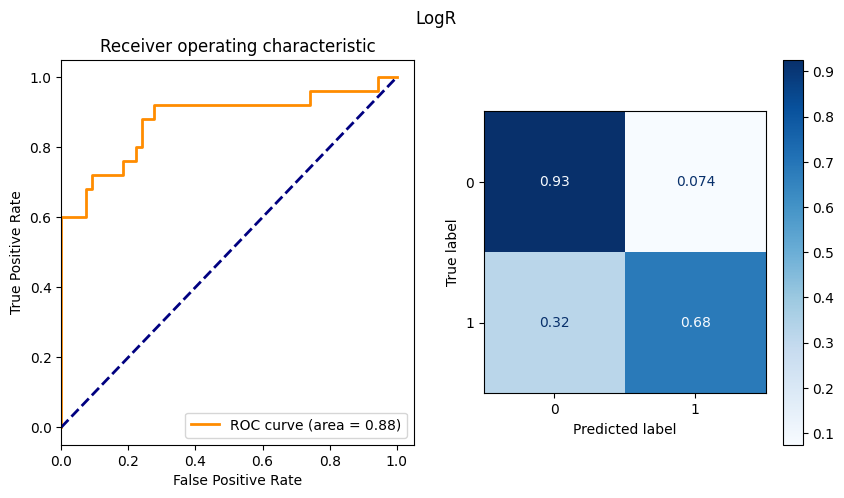

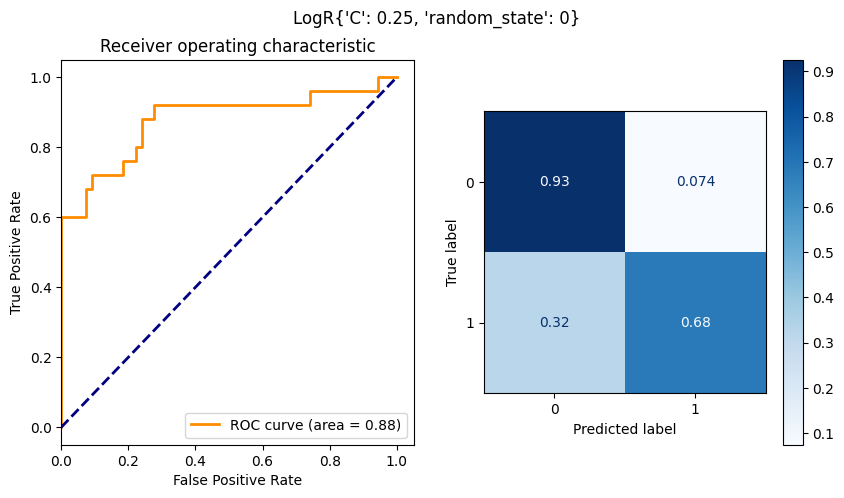

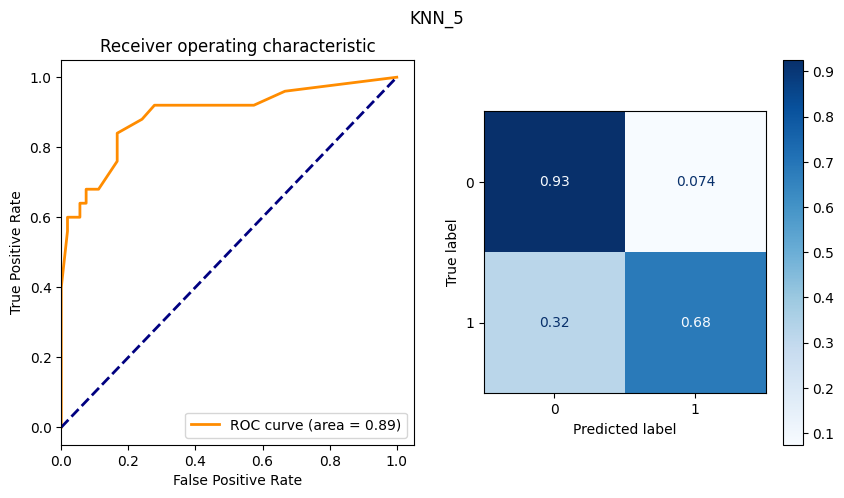

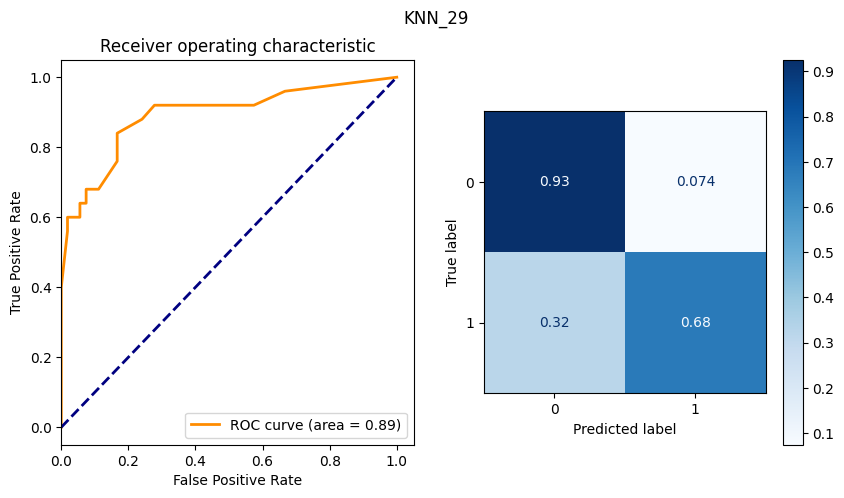

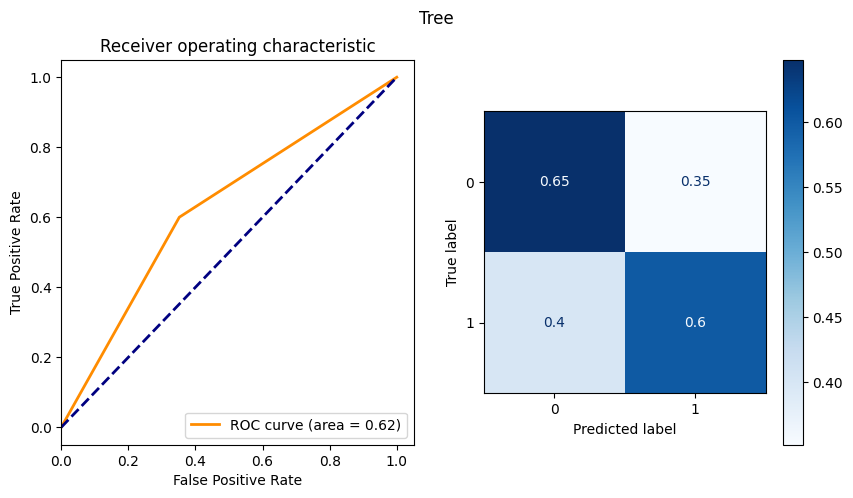

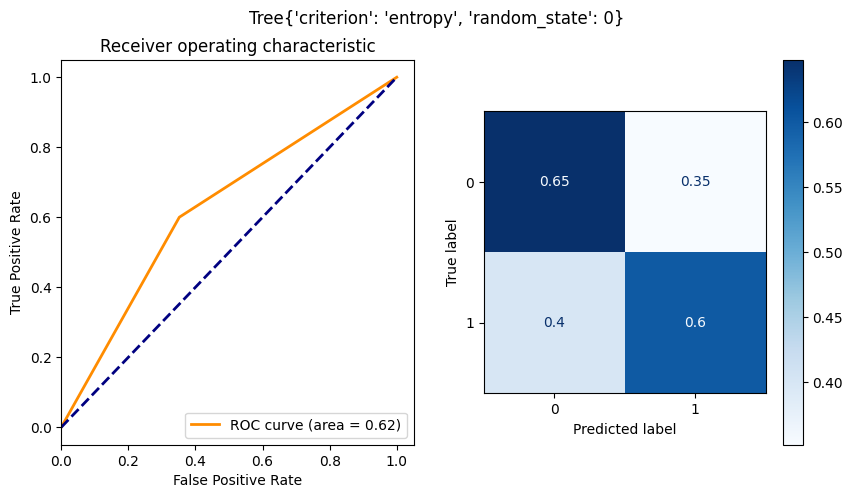

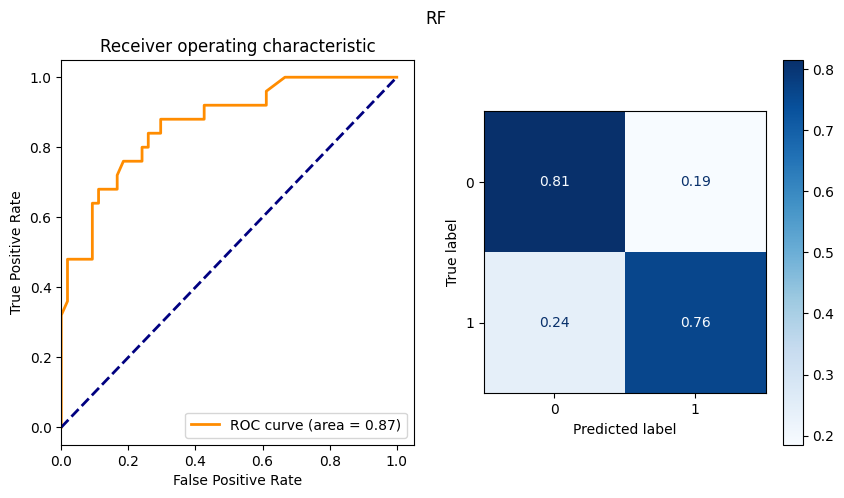

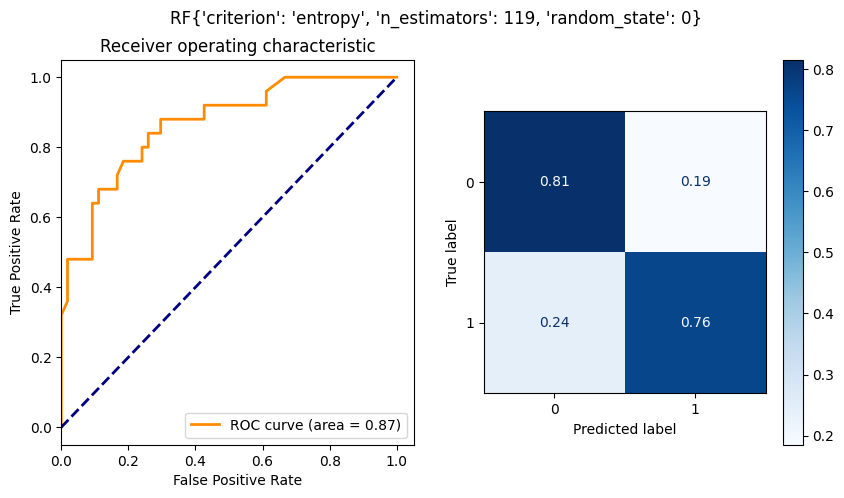

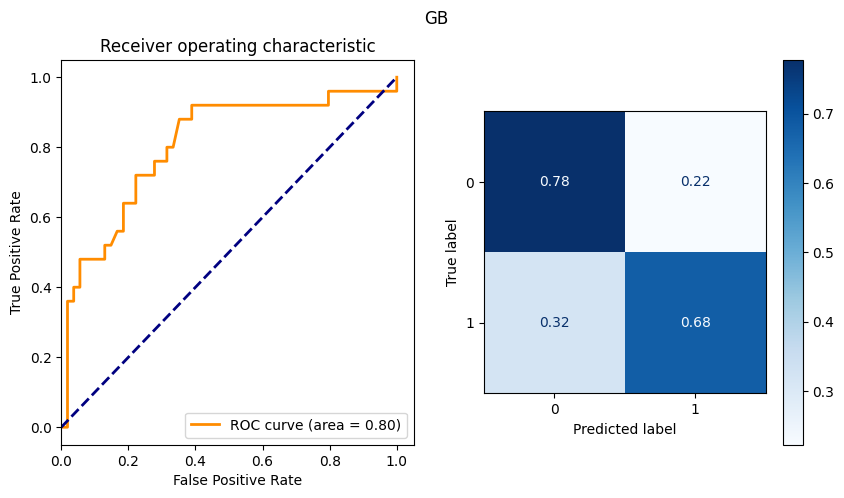

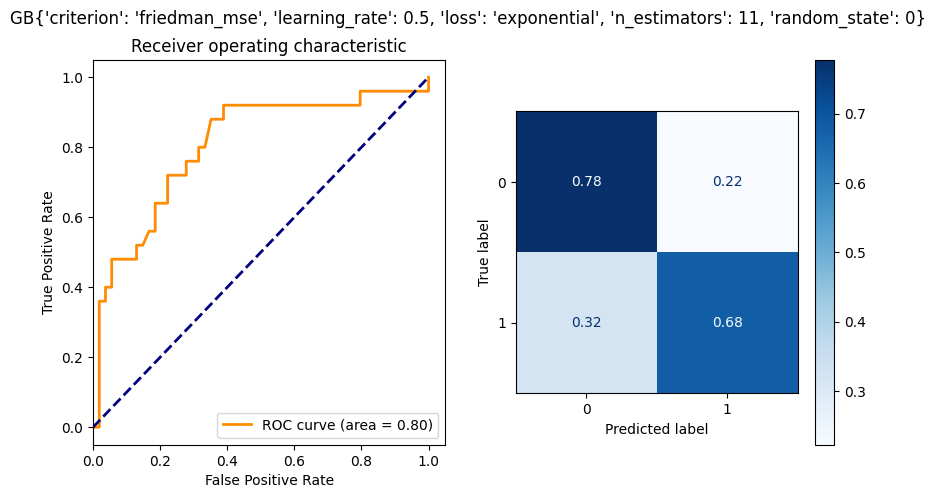

In [52]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпараметров на качество моделей и т.д.

In [53]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
# clas_metrics
clas_models_grid = {'LogR': LogisticRegression(C = 1, random_state = 0),
                    str('LogR' + clf_gs1_best_params_txt):clf_gs1.best_estimator_,
                    'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs2_best_params_txt):clf_gs2.best_estimator_,
                    'Tree':DecisionTreeClassifier(criterion = 'gini', random_state = 0),
                    str('Tree' + clf_gs3_best_params_txt):clf_gs3.best_estimator_,
                    'RF':RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 0),
                    str('RF' + clf_gs4_best_params_txt):clf_gs4.best_estimator_,
                    'GB':GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'exponential', n_estimators = 50, random_state = 0),
                    str('GB' + clf_gs5_best_params_txt):clf_gs5.best_estimator_
                    }

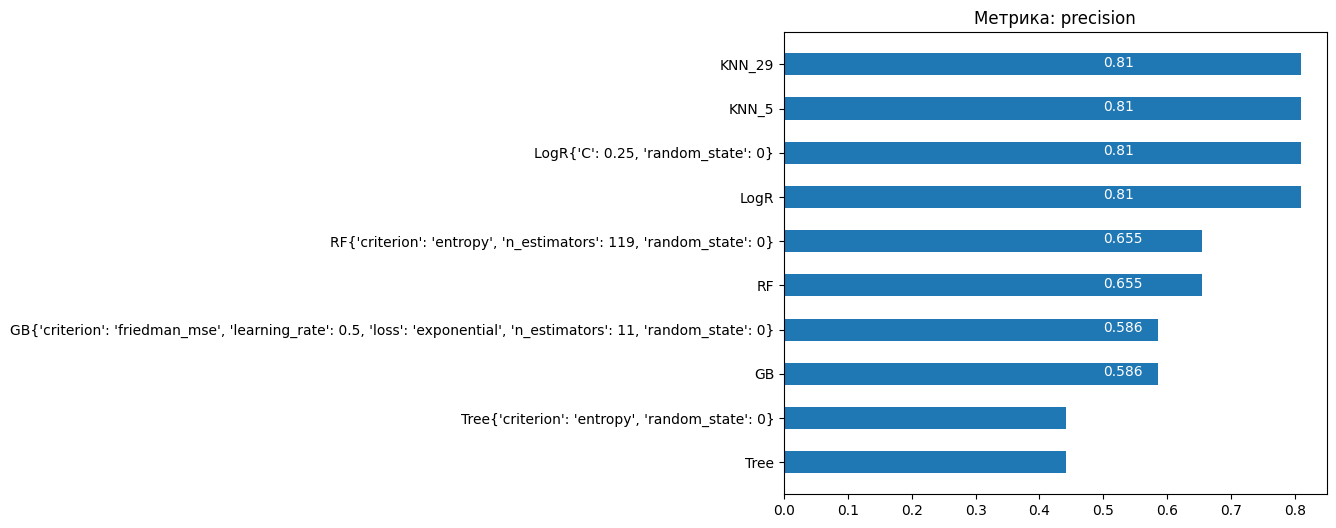

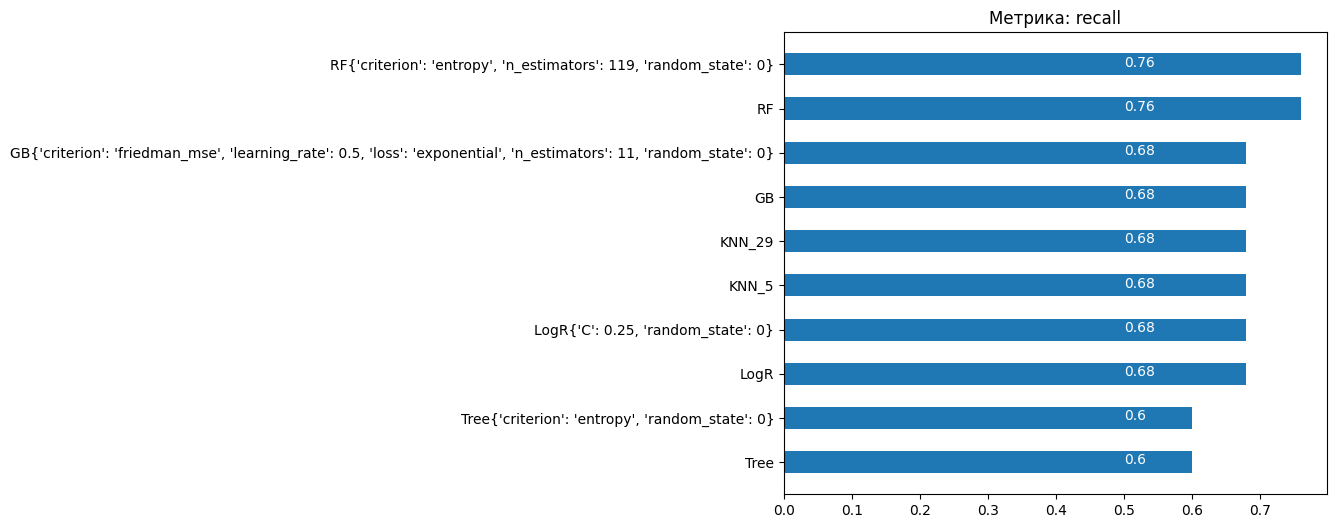

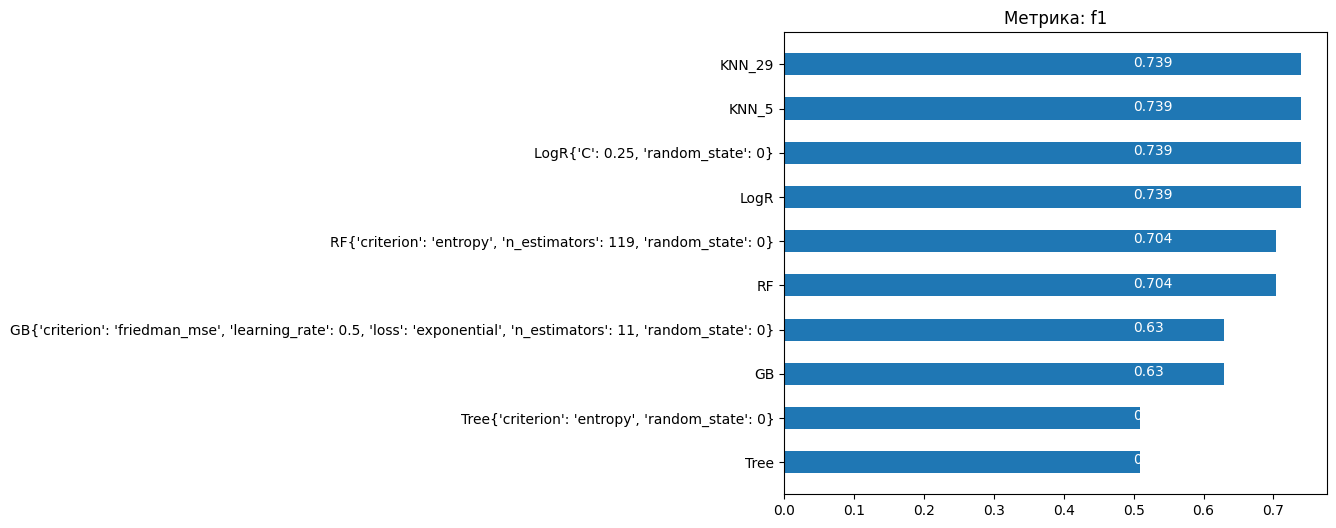

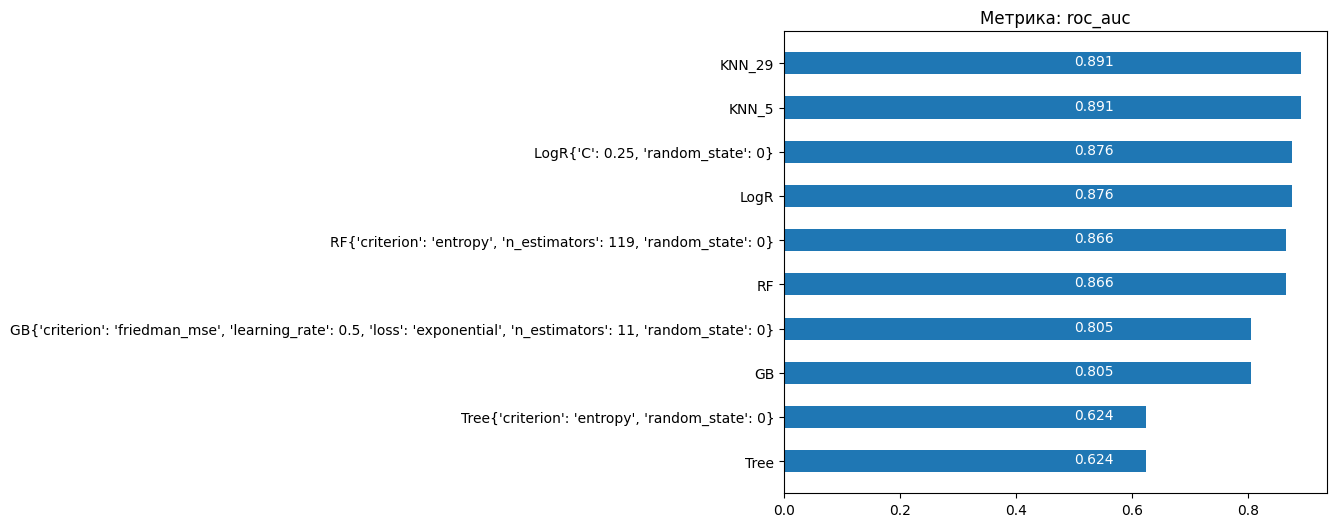

In [54]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

### Вывод: на основании трех метрик из четырех используемых, лучшей оказалась модель KNN_29.